In [1]:
import numpy as np
import pandas as pd

import networkx as nx

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
import clustergraph.plot_graph as pg
import pandas as pd
import os

file_path = "data/GSM3618022_gene_count_RPI4.csv"
df = pd.read_csv(file_path,sep=",")  # Use sep="," if it's CSV

print(df.head())  # Show first few rows
print(df.shape)

X = df.iloc[:, 1:].to_numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(0.92)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

           gene_id  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  P15  P16  P17   
0  ENSG00000228611   0   0   0   0   0   0   0   0   0  ...    0    0    0  \
1  ENSG00000226147   0   0   0   0   0   0   0   0   0  ...    0    0    0   
2  ENSG00000251138   0   0   0   0   0   0   0   0   0  ...    0    0    0   
3  ENSG00000233733   0   0   0   0   0   0   0   0   0  ...    0    0    0   
4  ENSG00000274680   0   0   0   0   0   0   0   0   0  ...    0    0    0   

   P18  P19  P20  P21  P22  P23  P24  
0    0    1    0    0    0    0    0  
1    0    1    0    0    0    0    0  
2    0    1    0    0    0    0    0  
3    0    1    0    0    0    0    0  
4    0    1    0    0    0    0    0  

[5 rows x 384 columns]
(28466, 384)
(28466, 15)


In [2]:
import numpy as np
from collections import Counter

model = KMeans(20, random_state=42)
pred = model.fit_predict(X_pca)

# Count number of points in each cluster
cluster_counts = Counter(pred)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted = dict(sorted(cluster_counts.items()))

# Print results
for cluster, count in cluster_counts_sorted.items():
    print(f"Cluster {cluster}: {count} points")

# We keep only clusters with more than 50 points covered
clusters_to_keep = {cluster for cluster, count in cluster_counts_sorted.items() if count > 3000}


# Get boolean mask for selected clusters
mask = np.isin(pred, list(clusters_to_keep))

# Filter X_pca based on the mask
X_filtered = X_pca[mask]

C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 24586 points
Cluster 1: 1 points
Cluster 2: 64 points
Cluster 3: 4 points
Cluster 4: 3038 points
Cluster 5: 23 points
Cluster 6: 4 points
Cluster 7: 1 points
Cluster 8: 14 points
Cluster 9: 6 points
Cluster 10: 9 points
Cluster 11: 546 points
Cluster 12: 3 points
Cluster 13: 1 points
Cluster 14: 2 points
Cluster 15: 158 points
Cluster 16: 1 points
Cluster 17: 1 points
Cluster 18: 2 points
Cluster 19: 2 points


In [3]:
print(X_filtered.shape)

model = KMeans(20, random_state=42)
pred_filtered = model.fit_predict(X_filtered)

# Count number of points in each cluster
cluster_counts_filtered = Counter(pred_filtered)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted_filtered = dict(sorted(cluster_counts_filtered.items()))

# Print results
for cluster, count in cluster_counts_sorted_filtered.items():
    print(f"Cluster {cluster}: {count} points")

(27624, 15)


C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 25 points
Cluster 1: 4277 points
Cluster 2: 284 points
Cluster 3: 8 points
Cluster 4: 127 points
Cluster 5: 1427 points
Cluster 6: 2478 points
Cluster 7: 17105 points
Cluster 8: 185 points
Cluster 9: 18 points
Cluster 10: 15 points
Cluster 11: 807 points
Cluster 12: 444 points
Cluster 13: 5 points
Cluster 14: 12 points
Cluster 15: 55 points
Cluster 16: 265 points
Cluster 17: 38 points
Cluster 18: 48 points
Cluster 19: 1 points


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=14, random_state=42)
gmm_labels = gmm.fit_predict(X_filtered)

# Count number of points in each cluster
cluster_counts_filtered = Counter(gmm_labels)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted_filtered = dict(sorted(cluster_counts_filtered.items()))

# Print results
for cluster, count in cluster_counts_sorted_filtered.items():
    print(f"Cluster {cluster}: {count} points")

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=15)
agglo_labels = agglo.fit_predict(X_filtered)

# Count number of points in each cluster
cluster_counts_filtered = Counter(agglo_labels)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted_filtered = dict(sorted(cluster_counts_filtered.items()))

# Print results
for cluster, count in cluster_counts_sorted_filtered.items():
    print(f"Cluster {cluster}: {count} points")

In [4]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=10, random_state=42, affinity='nearest_neighbors', n_neighbors=1000)
spectral_labels = spectral.fit_predict(X_filtered)

# Count number of points in each cluster
cluster_counts_filtered = Counter(spectral_labels)

# Convert to a sorted dictionary (optional)
cluster_counts_sorted_filtered = dict(sorted(cluster_counts_filtered.items()))

# Print results
for cluster, count in cluster_counts_sorted_filtered.items():
    print(f"Cluster {cluster}: {count} points")

Cluster 0: 2505 points
Cluster 1: 1502 points
Cluster 2: 2897 points
Cluster 3: 5292 points
Cluster 4: 2278 points
Cluster 5: 4119 points
Cluster 6: 1566 points
Cluster 7: 2476 points
Cluster 8: 1701 points
Cluster 9: 3288 points


# ClusterGraph

Execution Time: 4667.36 seconds


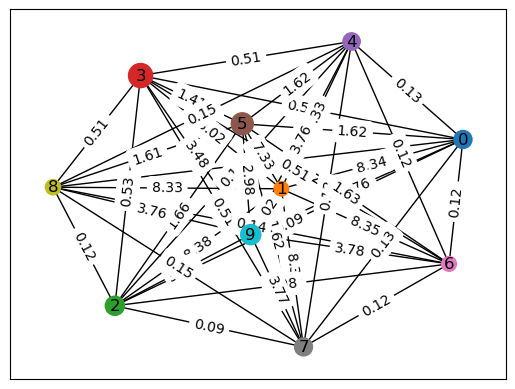

In [5]:
import time
start_time = time.time()

cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(spectral_labels), X=X_filtered, metric_clusters="average"
)

# Coloring the graph
cluster_g.color_graph(
    node_color_labels=spectral_labels,
    node_palette=cm.get_cmap("tab20"),
)
end_time = time.time()
print(f"Execution Time: {end_time - start_time:.2f} seconds")
pg.draw_graph(cluster_g.Graph, size_nodes=1000, random_state=42)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

tab20_colors = sns.color_palette("tab20", n_colors=15)
# Map each cluster label to its corresponding color (in hexadecimal format)
label_colors = [tab20_colors[label] for label in spectral_labels]
hex_colors = [matplotlib.colors.to_hex(color) for color in label_colors]
hex_colors = np.array(hex_colors)

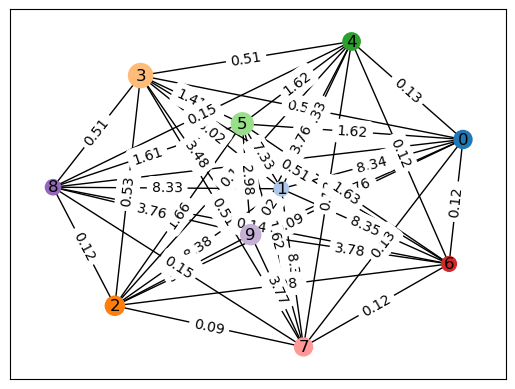

In [7]:
# Coloring the graph
cluster_g.color_graph(
    node_color_labels=hex_colors,
    node_palette=cm.get_cmap("tab20"),
)

pg.draw_graph(cluster_g.Graph, size_nodes=1000, random_state=42)

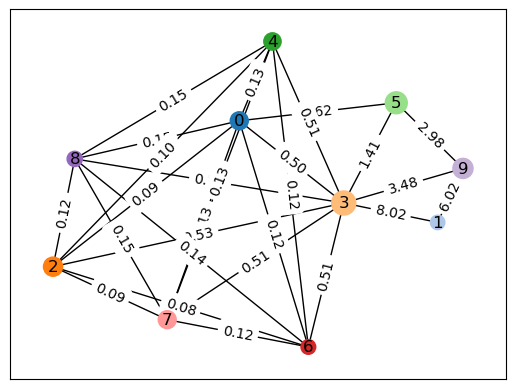

In [19]:
connectivity_graph, conn = cluster_g.prune_conn(score=True)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=18)
pg.draw_graph(connectivity_graph, size_nodes=1000, random_state=42)

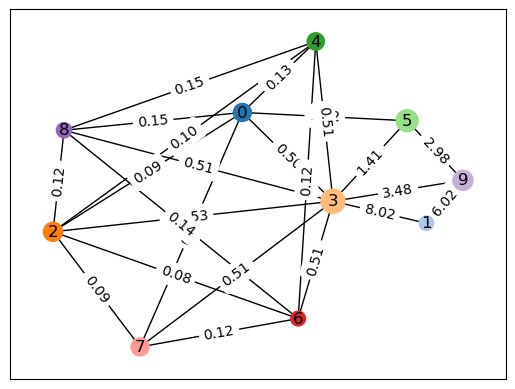

In [25]:
import copy
edges_to_remove =  [(7,8),(4,7),(6,0)]
connectivity_graph_easy = copy.deepcopy(connectivity_graph)

# Remove the edges
connectivity_graph_easy.remove_edges_from(edges_to_remove)
pg.draw_graph(connectivity_graph_easy, size_nodes=1000, random_state=42)

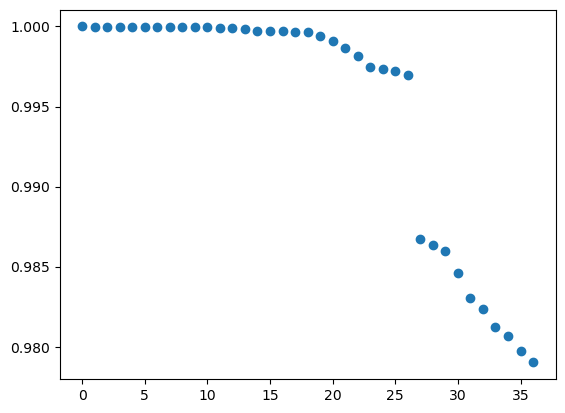

In [9]:
plt.scatter( list(range(len(conn))), conn  )

# Other methods

In [10]:
import umap as um
import matplotlib.pyplot as plt
import seaborn as sns
import phate
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_filtered)

# Fit UMAP
uma = um.UMAP(n_neighbors=15, random_state=42)
X_umap = uma.fit_transform(X_filtered)

# Fit PHATE
phate_operator = phate.PHATE(n_jobs=-2)
X_phate = phate_operator.fit_transform(X_filtered)


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Fit PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Calculating PHATE...
  Running PHATE on 27624 observations and 15 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 5.93 seconds.
    Calculating affinities...


C:\Users\mathi\AppData\Roaming\Python\Python310\site-packages\graphtools\graphs.py:290: RuntimeWarning: Detected zero distance between 24103 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
C:\Users\mathi\AppData\Roaming\Python\Python310\site-packages\graphtools\graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Calculated affinities in 1.29 seconds.
  Calculated graph and diffusion operator in 7.32 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.81 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.24 seconds.
  Calculated landmark operator in 10.85 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 3.05 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.19 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.79 seconds.
Calculated PHATE in 32.23 seconds.


In [ ]:
label_2_count = np.sum(hex_colors == "#e377c2")
label_2_count 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Plot UMAP projection with color mapped to hex_colors
plt.figure(figsize=(8, 6))

# Scatter plot with colors assigned from hex_colors
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=hex_colors, s=20)

# Customize the legend
# Create a list of unique colors and corresponding labels
unique_labels = np.unique(gmm_labels)  # Assuming gmm_labels is available
handles = []

for label in unique_labels:
    color = hex_colors[gmm_labels == label][0]  # Get color for each cluster
    handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
    handles.append(handle)

# Add the custom legend
plt.legend(handles=handles, labels=[f"Cluster {label}" for label in unique_labels], title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Add labels and title
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Projection with GMM Labels")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Plot PHATE projection with color mapped to hex_colors
plt.figure(figsize=(8, 6))

# Scatter plot with colors assigned from hex_colors
scatter = plt.scatter(X_phate[:, 0], X_phate[:, 1], c=hex_colors, s=30)

# Customize the legend
# Create a list of unique labels and corresponding colors
unique_labels = np.unique(gmm_labels)  # Assuming gmm_labels is available
handles = []

for label in unique_labels:
    color = hex_colors[gmm_labels == label][0]  # Get color for each cluster
    handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
    handles.append(handle)

# Add the custom legend
plt.legend(handles=handles, labels=[f"Cluster {label}" for label in unique_labels], title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Add labels and title
plt.xlabel("PHATE Component 1")
plt.ylabel("PHATE Component 2")
plt.title("PHATE Projection with GMM Labels")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Plot t-SNE projection with color mapped to hex_colors
plt.figure(figsize=(8, 6))

# Scatter plot with colors assigned from hex_colors
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hex_colors, s=30)

# Customize the legend
# Create a list of unique labels and corresponding colors
unique_labels = np.unique(gmm_labels)  # Assuming gmm_labels is available
handles = []

for label in unique_labels:
    color = hex_colors[gmm_labels == label][0]  # Get color for each cluster
    handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
    handles.append(handle)

# Add the custom legend
plt.legend(handles=handles, labels=[f"Cluster {label}" for label in unique_labels], title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Add labels and title
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection with GMM Labels")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Plot PCA projection with color mapped to hex_colors
plt.figure(figsize=(8, 6))

# Scatter plot with colors assigned from hex_colors
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hex_colors, s=30)

# Customize the legend
# Create a list of unique labels and corresponding colors
unique_labels = np.unique(gmm_labels)  # Assuming gmm_labels is available
handles = []

for label in unique_labels:
    color = hex_colors[gmm_labels == label][0]  # Get color for each cluster
    handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
    handles.append(handle)

# Add the custom legend
plt.legend(handles=handles, labels=[f"Cluster {label}" for label in unique_labels], title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Add labels and title
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection with GMM Labels")

plt.show()


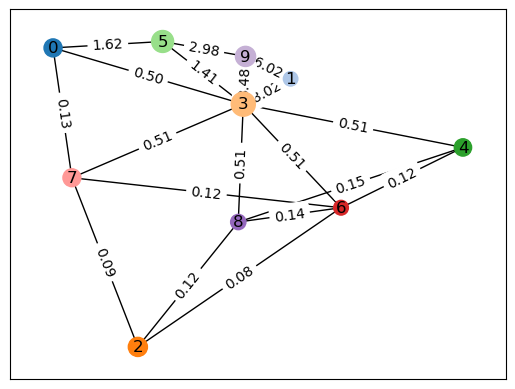

In [34]:
import copy
edges_to_remove =  [(7,8),(4,7),(6,0),(4,0),(2,3),(4,2),(0,2),(0,8)]
connectivity_graph_easy = copy.deepcopy(connectivity_graph)

# Remove the edges
connectivity_graph_easy.remove_edges_from(edges_to_remove)
pg.draw_graph(connectivity_graph_easy, size_nodes=1000, random_state=42)

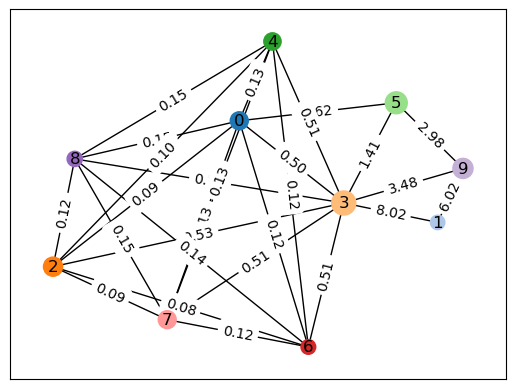

In [48]:
connectivity_graph, conn = cluster_g.prune_conn(score=True)

connectivity_graph_easy = cluster_g.prune_conn(nb_edge_pruned=18)
pg.draw_graph(connectivity_graph_easy, size_nodes=1000, random_state=42)

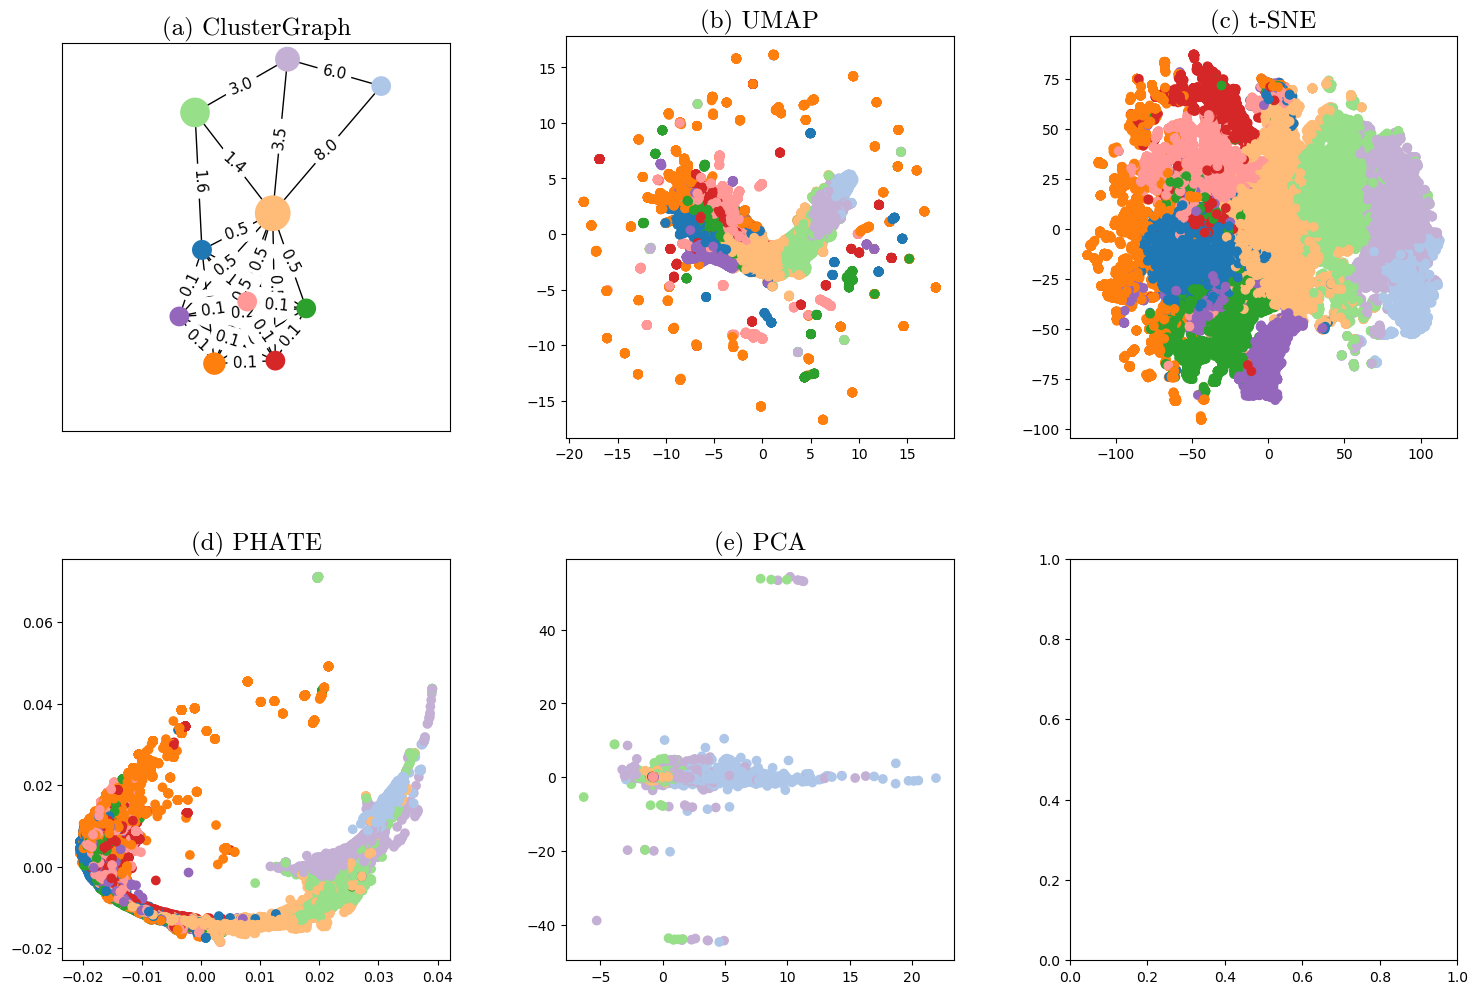

In [55]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# --- Network Graph ---
pos = nx.spring_layout(
    connectivity_graph_easy, seed=42, iterations=100, scale=0.9, center=(0, 0), weight="spring"
)

# Draw edges first
nx.draw_networkx_edges(connectivity_graph_easy, pos=pos, ax=axs[0, 0])

# Draw edge labels
edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in connectivity_graph_easy.edges(data=True)
}
nx.draw_networkx_edge_labels(
    connectivity_graph_easy,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=11,
    ax=axs[0, 0],
)

# Draw nodes as pie charts
for node, data in connectivity_graph_easy.nodes(data=True):
    attributes = connectivity_graph_easy.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs[0, 0].pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.3, 0.05),
        frame=True,
    )

# Ensure axis respects limits
axs[0, 0].set_xlim(*axs[0, 0].get_xlim())
axs[0, 0].set_ylim(*axs[0, 0].get_ylim())
axs[0, 0].set_xlim(-0.98, 0.98)  # Expand x limits
axs[0, 0].set_ylim(-0.98, 0.98)
axs[0, 0].set_aspect("equal")
axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

# --- Other Projections ---
axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=hex_colors)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)

axs[0, 2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hex_colors)
axs[0, 2].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

axs[1, 0].scatter(X_phate[:, 0], X_phate[:, 1], c=hex_colors)
axs[1, 0].set_title("(d) PHATE", fontname="serif", family="cmr10", size=18)

axs[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=hex_colors)
axs[1, 1].set_title("(e) PCA", fontname="serif", family="cmr10", size=18)

# --- Adjust Layout ---
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig("SpectralC_10clusters_RPI4.pdf")
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 12))

pos = nx.spring_layout(
    connectivity_graph, seed=42, iterations=100, scale=1, center=(0, 0), weight="spring"
)

nx.draw_networkx_edges(connectivity_graph, pos=pos, ax=axs[0, 0])

edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in connectivity_graph.edges(data=True)
}
nx.draw_networkx_edge_labels(
    connectivity_graph,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=9,
    ax=axs[0, 0],
)

xlim = axs[0, 0].get_xlim()
ylim = axs[0, 0].get_ylim()

for node, data in connectivity_graph.nodes(data=True):

    attributes = connectivity_graph.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs[0, 0].pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.3, 0.05),
        frame=True,
    )


#axs[0, 0].legend(handles=patches, loc="upper left")

axs[0, 0].set_aspect("auto")
xlim = (xlim[0] * 0.9, xlim[1] * 0.9)
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim((-(xlim[1] - xlim[0]) / 2, (xlim[1] - xlim[0]) / 2))


axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=hex_colors)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)

axs[0, 2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hex_colors)
axs[0, 2].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

axs[1, 0].scatter(X_phate[:, 0], X_phate[:, 1], c=hex_colors)
axs[1, 0].set_title("(d) PHATE", fontname="serif", family="cmr10", size=18)

axs[1, 2].scatter(X_pca[:, 0], X_pca[:, 1], c=hex_colors)
axs[1, 2].set_title("(e) PCA", fontname="serif", family="cmr10", size=18)


plt.tight_layout()
#plt.savefig("mice.pdf")
plt.show()